# 04-Graphing and analyzing data

## 4.1 <tt>gnuplot</tt>

`gnuplot` is one of the most widely used programs, and is available for a wide variety of platforms (even for Android!).  It has a quick learning curve for simple graphs, but anything elaborate or requiring some serious computations, even if possible, gets to be quite difficult quickly.  The current version of `gnuplot` is 5.2 and there is an excellent reference book:

  * <a href="http://www.gnuplot.info/index.html" target="_blank">gnuplot home page</a>, including
  * <a href="http://www.gnuplot.info/docs_5.0/gnuplot.pdf" target="_blank">the official user manual</a>  
  * <a href="http://gnuplot.sourceforge.net/demo_5.0/" target="_blank">a large collection of sample scripts</a>
  * <a href="https://alogus.com/publishing/gnuplot5/" target="_blank">an inexpensive and very comprehensive e-book</a>

We have already seen some basic use in the previous part of the course.  Here's a slightly more elaborate example which involves fitting and some annotation.


In [1]:
%cd ~/5P10

/home/esternin/5P10


In [2]:
# This loads the gnuplot kernel extension, for embedded gnuplot use
%load_ext gnuplot_kernel
%gnuplot inline pngcairo size 800,1200 font "Palatino,16"

In [3]:
%%file VI.dat
#  V   I,mA
  0   0.468
  1   0.405
  2   0.342
  3   0.279
  4   0.216
  5   0.153
  6   0.090
  6.4 0.064

Writing VI.dat


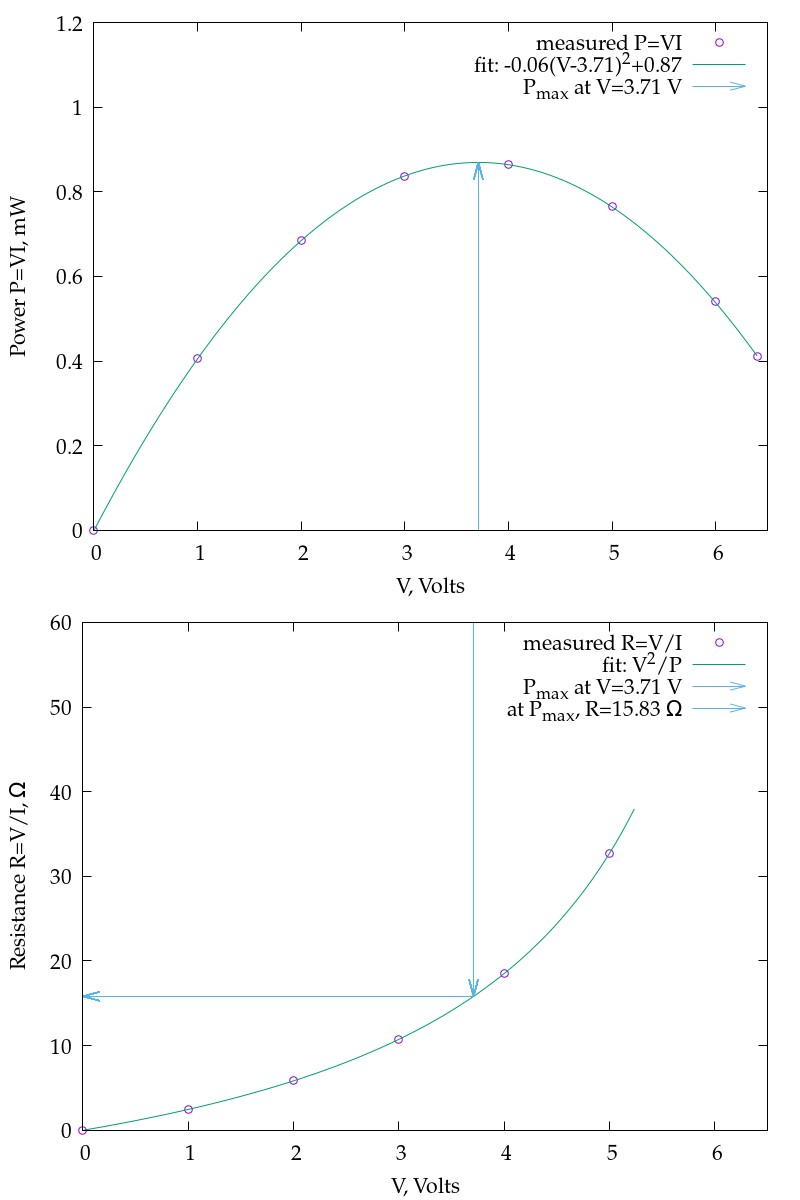

stats 'VI.dat'

* FILE: 
  Records:           8
  Out of range:      0
  Invalid:           0
  Column headers:    0
  Blank:             0
  Data Blocks:       1

* COLUMNS:
  Mean:               3.4250            0.2521
  Std Dev:            2.1827            0.1376
  Sample StdDev:      2.3335            0.1472
  Skewness:          -0.1191            0.1168
  Kurtosis:           1.6791            1.6801
  Avg Dev:            1.9250            0.1214
  Sum:               27.4000            2.0170
  Sum Sq.:          131.9600            0.6601

  Mean Err.:          0.7717            0.0487
  Std Dev Err.:       0.5457            0.0344
  Skewness Err.:      0.8660            0.8660
  Kurtosis Err.:      1.7321            1.7321

  Minimum:            0.0000 [0]        0.0640 [7]
  Maximum:            6.4000 [7]        0.4680 [0]
  Quartile:           1.5000            0.1215
  Median:             3.5000            0.2475
  Quartile:           5.5000            0.3735

  Linear Model:

In [4]:
%%gnuplot
## a sample script to demonstrate some more advanced features of gnuplot
## By edward.sternin@brocku.ca
## 2018.02

## outside of the jupyter notebook, can use these lines instead of a separate data file,
## and then use $DATA instead of every occurrence of 'VI.dat' below.  It's a limitation of
## jupyter, and not of gnuplot.

#$DATA << EOD
##  V   I,mA
#  0   0.468
#  1   0.405
#  2   0.342
#  3   0.279
#  4   0.216
#  5   0.153
#  6   0.090
#  6.4 0.064
#EOD

# scan through the data file
stats 'VI.dat'
# a few examples of useful values:
#x_max=STATS_max_x
#y_min=STATS_min_y
#Npts=STATS_records
#  etc.

## fit the data
set dummy v
P(v)=a*(v-Vo)**2+b
Vo=4
a=-15
b=0.85
# fit does NOT like zero starting values for any parameters, so do not skip the previous lines
fit P(v) 'VI.dat' using ($1):($1)*($2) via Vo,a,b

# two rows, one column is the layout of outputs for our multiple "plot ..." commands
set multiplot layout  2,1

## upper frame, P vs. V
set xlabel 'V, Volts'
set ylabel 'Power P=VI, mW'
plot[0:6.5] [0.:1.2] 'VI.dat' using ($1):($1)*($2) with points pt 6 ps 1.25 t 'measured P=VI',\
	[STATS_min_x:STATS_max_x] P(v) t sprintf("fit: %.2f(V-%.2f)^2+%.2f",a,Vo,b),\
	'+' using (Vo):(-0.4):(0):(0.4+b) with vectors t sprintf("P_{max} at V=%.2f V",Vo)

## lower frame, R vs. V
Ro=Vo**2/b
set xlabel 'V, Volts'
set ylabel 'Resistance R=V/I, {/Symbol W}'
plot [0:6.5] [0:60] 'VI.dat' using ($1):($1)/($2) with points pt 6 ps 1.25 t 'measured R=V/I',\
	[STATS_min_x:STATS_max_x] (v<=5.3 ? v**2/P(v) : NaN ) t 'fit: V^2/P',\
	'+' using (Vo):(60):(0):(-60+Ro) with vectors ls 3 t sprintf("P_{max} at V=%.2f V",Vo),\
	'+' using (Vo):(Ro):(-Vo):(0) with vectors ls 3 t sprintf("at P_{max}, R=%.2f {/Symbol W}",Ro)
                       
unset multiplot

<tt>gnuplot</tt> also has some programming ability.  Here's an example of a recursively-defined function.  It plots a truncated FT decomposition of a square wave, to an arbitrary order of truncation:

In [5]:
%gnuplot inline pngcairo size 800,600 font "Palatino,16"

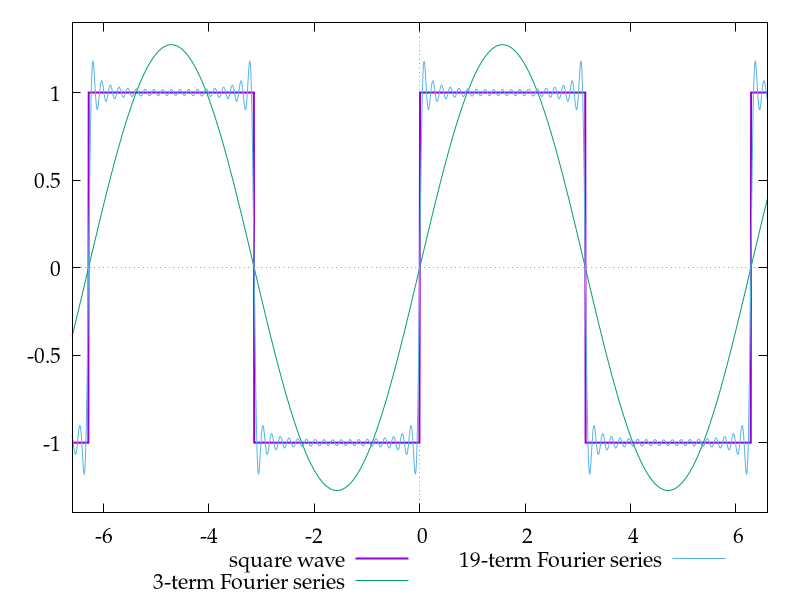

In [6]:
%%gnuplot
# for a clean start, as gnuplot may remember things from previous scripts
reset

# set parameters controlling the appearance of the graphs
set xrange [-2.1*pi:2.1*pi]
set yrange [-1.4:1.4]
set samples 2001
set key below
set zeroaxis

# define the Fourier series' expansion iteratively: sin(x)+sin(3x)/3+sin(5x)/5+...
f(x,n) = (n==1) ? (4/pi)*sin(x) : f(x,n-1) + (4/pi)*sin((2*n-1)*x)/(2*n-1)

# plot the original square wave, and a couple of interesting approximations
plot sgn(sin(x)) t 'square wave' lw 2,\
     f(x,1)  t '3-term Fourier series',\
     f(x,19) t '19-term Fourier series'

Of course, there are also excellent plotting capabilities within `python`, `matlab/octave` and `maple` environments, all with much more sophisticated computational capabilities. We will learn these as we go along.  However, the flexibility and the ability to generate both screen-friendly bitmap (e.g. PNG) plots and publication-quality scalable vector (SVG, Encapsulated PostScript, LaTeX, etc.) plots makes `gnuplot` (and/or `eXtrema`, see Section 4.3 below)  useful additions to the scientific toolbox.

## 4.2 Homework: analysis of the Cavendish experiment

Lord Cavendish was the designer of the original experiment that used a pair of lead spheres and a very sensitive torsional balance to measure the universal gravitational constant, $G$. A manual for a modern version of such a torsional balance is <a href="http://www.physics.brocku.ca/Courses/5P10/References/012-11032A.pdf" target="_blank">here</a>.  As described there, in Fig.18 on p.13, the following set of data was obtained. The distance to the board on which the position of the laser dot was recorded was $L=10.31$m.
<p>
Produce an <tt>eXtrema</tt> or a <tt>gnuplot</tt> macro that would plot and analyze the data, and calculate $G$ from it. It appears that a good fit would result from fitting $S(t)=S_0+Ae^{-(t-t_0)/\tau}\cos [\omega (t-t_0)]$ to each segment of the experiment with $S_0$, $A$, $t_0$, $\tau$ and $\omega$ the parameters of the fit. Without knowing the exact geometry of the experiment, $\Delta S$ between the two equilibrium positions cannot be used, but perhaps the oscillation period can be extracted and used in the analysis. Use the average of the two values obtained for both sections of the data.
<p>
A more careful examination reveals that there might be a small drift in the data. Model it by a small linear-in-time correction term, $\alpha(t-t_0)$, and see if the precision of the fit improves. 

In [7]:
%%file Cavendish.dat
# Cavendish experiment 2012-02-24
## minutes, position_of_dot, cm

# set spheres to one side at 11:45:00, 45 mins since the start
45	57.5
45.5	58
46	58.5
46.5	60.5
47	63
47.5	66
48	69
48.5	72
49	74.5
49.5	76.7
50	78
50.5	78.7
51	78.7
51.5	78
52	76.7
52.5	75.
53	73
53.5	70.8
54	69.2
54.5	67.7
55	66.8
55.5	66.4
56	66.5
56.5	67.1
57	68.1
57.5	69.2
58	70.7
58.75	73.2
59	73.8
59.5	74.8
60	75.6
60.5	76.1
61	76.1
61.5	75.8
62	75.1
62.5	74.2
63	73.2
63.5	72.2
64	71.5
64.5	70.7
65	70.1
65.5	69.9
66	69.9
66.5	70.1
67	70.6
67.5	71.2
68	72
68.5	72.7
69	73.4
69.5	74
70	74.2
70.5	74.6
71	74.7
72	74.1
72.5	73.8	
73	73.2
73.5	72.8
74	72.2
74.75	71.8
75	71.6
75.5	71.5
76	71.4
76.5	71.6
77	72
77.75	72.6
78	72.8
78.5	73.1
79	73.5
79.25	73.7
79.5	73.9
79.75	74
80	74.1
80.25	74.1
80.5	74.1
80.75	74.1
81	74.1
81.25	74
81.5	74
81.75	74
82	73.8
82.5	73.7
83	73.4
83.5	73.1
84	72.9
84.5	72.7
85.25	72.7
85.5	72.7
86	72.6
86.5	72.6
87	72.7
87.5	72.8
88	73.1
88.5	73.3
89	73.6
89.5	73.7
90	73.8
90.5	74
91	74
93	73.8
93.5	73.6
94	73.5
98	73.3


# reverse the spheres at 13:25:00, 145 mins since the start
145	75.5
145.5	73.8
146	69.8
146.5	61.5
147	55
147.5	46.5
148	36.5
148.5	31
149	25.8
149.5	22.6
150	21.6
150.5	23
151	26
151.5	30.8
152	36.6
152.5	42.5
153	48.1
153.5	53.2
154	57.3
154.5	59.5
155	60.2
155.5	59.7
155.75	58.8
156	57.7
156.25	56.2
156.5	54.5
156.75	52.8
157	50.8
157.25	48.7
157.5	46.5
157.75	44.5
158	42.5
158.25	40.6
158.5	38.8
158.75	37.2
159	35.9
159.25	34.8
159.5	34
159.75	33.6
160	33.2
160.25	33.2
160.5	33.6
160.75	34.1
161	35
161.25	35.9
161.5	37
161.75	38.2
162	39.5
162.5	42.5
163	45.3
163.5	48
164	50.1
164.5	51.5
165	52.2
165.5	52.1
166	51.2
166.5	49.8
167	48
167.5	45.9
168	43.8
168.5	42
169	40.5
169.5	39.2
170	38.9
170.75	39.2
171	39.7
171.5	40.6
172	41.9
172.5	43.6
173	44.9
173.75	46.9
174	47.5
174.5	48.2
175	48.7
175.5	48.7
176	48.4
176.5	47.7
177	47
177.5	46
178	45
178.5	44
179	43.1
179.5	42.7
180	42.3
180.5	42.1
181	42.5
181.5	42.9
182	43.4
182.5	44.1
183	44.7
183.5	45.5
184	46
184.5	46.4
185	46.7
185.5	46.7
186	46.7
186.5	46.4
187	46.1
187.5	45.6
188	45.2
188.5	44.7
189	44.3
189.5	44.1
190	43.9
191	44
191.5	44.2
192	44.6
192.5	44.7
193	45
193.5	45.4
194	45.7
194.5	45.9
195	46.1
195.5	46.1
196	46.1
196.5	46
197	45.9
197.5	45.6
198	45.4
198.5	45.2
199	44.9
199.5	44.7
200	44.5
202.5	44.6
204	45.4
205	45.7
217.5	45.6
217.75	45.4
218	45.4
218.5	45.3
219	45.3
219.5	45.4
220	45.5

Writing Cavendish.dat


In [8]:
%gnuplot inline pngcairo size 640,480 font "Palatino,16"

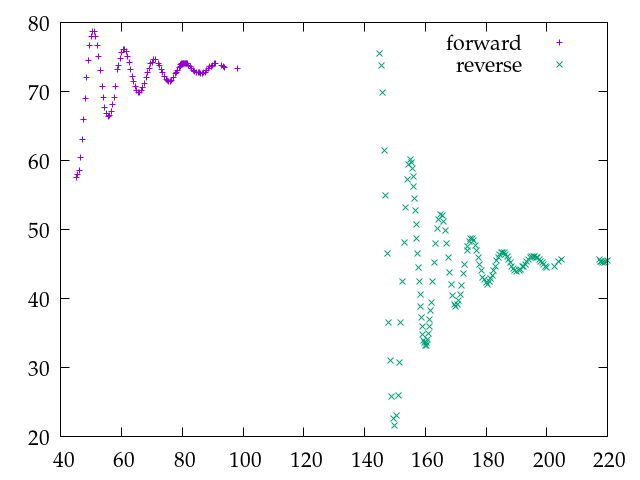

In [9]:
%%gnuplot
# for a clean start, as gnuplot may remember things from previous scripts
reset

#plot "Cavendish.dat" with lines

#plot "Cavendish.dat" using ($1 < 140 ? $1: NaN ):($2/100) w l title "forward",\
#     "Cavendish.dat" using ($1 > 140 ? $1: NaN ):($2/100) w l title "reversed"

### requires that TWO blank lines separate data into "blocks" in the data file
plot \
  "Cavendish.dat" index 0 with points title "forward",\
  ""              index 1 with points title "reverse"

## 4.3 eXtrema

The same, of course, can be done in `eXtrema`:

In [10]:
%%file Cavendish.pcm
read /work/5P10/Cavendish.dat t,x
x=x/100    ! cm -> m
m2s=60     ! mins to secs

clear
defaults
Pi=2.*acos(0.)

scales 40 220 0 0 0 0
set
  xlabel `<i1>t<i0>, min'
  ylabel `<i1>x(t)<i0>, m'
  plotsymbol -15
  %plotsymbolsize 0.75
  plotsymbolcolor purple

graph t,x
hardcopy\png Cavendish.png

Writing Cavendish.pcm


Run `eXtrema` and enter `@Cavendish` command to (re-)generate the plot before executing the next cell to include the output in this notebook.  Unfortunately, `extrema_kernel` does not exist, so we cannot run `eXtrema` within the noteboolk directly. If you execute a cell like this
```
! extrema
```
`eXtrema` will launch, but you will need to quit it before you can return to this jupyter notebook, so it's best to launch it separately, outside of this notebook. 

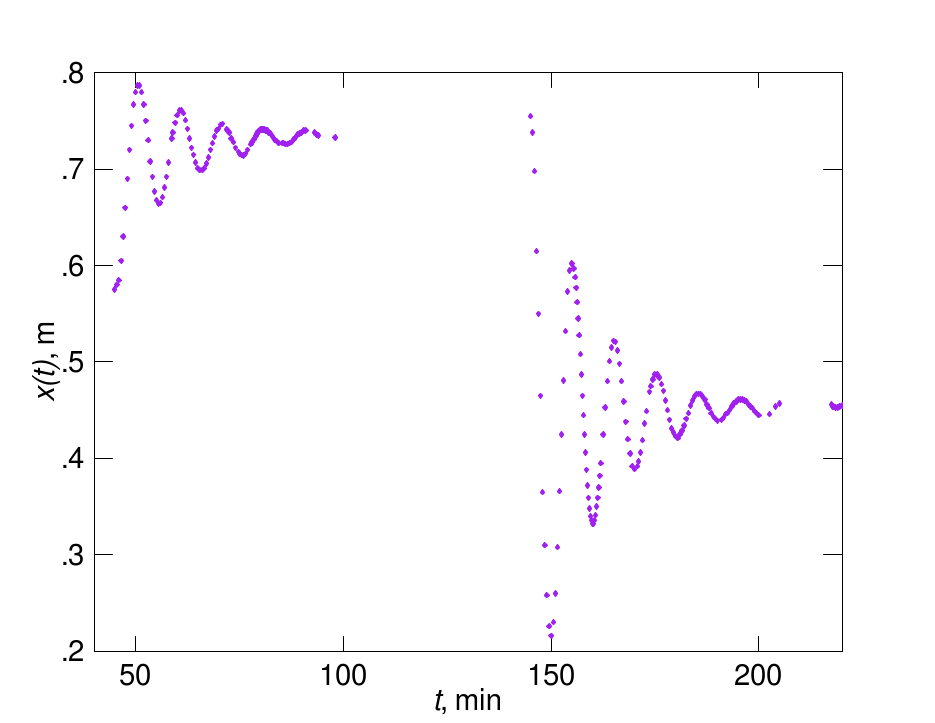

In [11]:
from IPython.display import display, Image
display(Image('Cavendish.png'))